# Anomally Detection using Autoencoders (Credit Card Dataset)

# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model, Sequential
from tensorflow.keras.losses import msle
from tensorflow.keras.layers import Dense, Dropout

# Load Dataset

In [4]:
df = pd.read_csv("creditcard.csv", header=None, low_memory=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,...,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0
2,0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,...,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0
3,1,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,...,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0
4,1,-0.966271711572087,-0.185226008082898,1.79299333957872,-0.863291275036453,-0.0103088796030823,1.24720316752486,0.23760893977178,0.377435874652262,-1.38702406270197,...,-0.108300452035545,0.00527359678253453,-0.190320518742841,-1.17557533186321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.5,0


In [5]:
df.shape

(284808, 31)

In [6]:
df = df.drop(0, axis=0)
df = df.drop(0, axis=1)

In [7]:
df[30].unique()

array(['0', '1'], dtype=object)

In [8]:
features = df.drop(30, axis=1)
target = df[30]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2)

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create AutoEncoder

In [11]:
class AutoEncoder(Model):
    def __init__(self,outputs):
        super().__init__()
        self.encoder = Sequential([
            Dense(64, activation="relu"),
            Dropout(0.1),
            Dense(32, activation="relu"),
            Dropout(0.1),
            Dense(16, activation="relu")
        ])
        self.decoder = Sequential([
            Dense(16, activation="relu"),
            Dropout(0.1),
            Dense(32, activation="relu"),
            Dropout(0.1),
            Dense(64, activation="relu"),
            Dropout(0.1),
            Dense(outputs, activation="sigmoid")
        ])
    def call(self, inputs):
        code = self.encoder(inputs)
        return self.decoder(code)

In [13]:
model = AutoEncoder(X_train.shape[1])
model.compile(optimizer="adam", loss="msle", metrics=["mse"])

In [14]:
e =11
H = model.fit(X_train, X_train, validation_data=(X_test, X_test), epochs=e)

Epoch 1/11
7121/7121 [==============================] - 16s 2ms/step - loss: 7.7111e-04 - mse: 0.0017 - val_loss: 4.1200e-04 - val_mse: 9.6728e-04
Epoch 2/11
7121/7121 [==============================] - 15s 2ms/step - loss: 4.7457e-04 - mse: 0.0011 - val_loss: 3.3677e-04 - val_mse: 8.2003e-04
Epoch 3/11
7121/7121 [==============================] - 15s 2ms/step - loss: 4.2559e-04 - mse: 9.9799e-04 - val_loss: 3.2389e-04 - val_mse: 7.9259e-04
Epoch 4/11
7121/7121 [==============================] - 13s 2ms/step - loss: 4.0648e-04 - mse: 9.5847e-04 - val_loss: 3.1206e-04 - val_mse: 7.6029e-04
Epoch 5/11
7121/7121 [==============================] - 15s 2ms/step - loss: 3.9218e-04 - mse: 9.2669e-04 - val_loss: 3.0534e-04 - val_mse: 7.4289e-04
Epoch 6/11
7121/7121 [==============================] - 16s 2ms/step - loss: 3.8157e-04 - mse: 9.0252e-04 - val_loss: 3.0170e-04 - val_mse: 7.2942e-04
Epoch 7/11
7121/7121 [==============================] - 15s 2ms/step - loss: 3.7202e-04 - mse: 8.7996e

# Plot MSE Loss

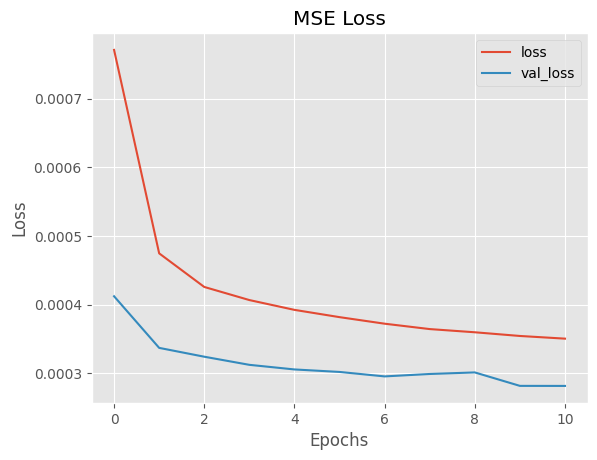

In [15]:
plt.style.use("ggplot")
plt.plot(np.arange(0,e), H.history["loss"], label="loss")
plt.plot(np.arange(0,e), H.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MSE Loss")
plt.legend()

# Find Threshold Value

In [16]:
reconstructions = model.predict(X_train)
reconstruction_errors = msle(reconstructions, X_train)
threshold = np.mean(reconstruction_errors.numpy()) + np.std(reconstruction_errors.numpy())
threshold

7121/7121 [==============================] - 6s 886us/step


0.0007369113876366535

In [17]:
pred = model.predict(X_test)
pred_errors = msle(pred, X_test)

1781/1781 [==============================] - 2s 883us/step


In [20]:
out = []
for error in  pred_errors:
    if error > threshold:
        out.append('1')
    else:
        out.append('0')

In [21]:
accuracy_score(out, Y_test)

0.9635195393420175